# Assignment 3 - N-Grams & Similarity

## Prompt

You have two zip files included into this assignment:

- Assignment Articles.zip  
- Assignment Books.zip

You need to determine which articles (from Articles.zip) are similar to each other and which books (from Books.zip) are more similar to each other.  In order to accomplish this you need to create n-grams (a.k.a. shingles) and compare the similarity of the text using Jaccard distance.

Your final submission must include the following:

1. Which articles / books were similar and which ones were dissimilar?
2. A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
3. Was the “n” identical or different for books vs. articles and why
4. Visualize the selection of “n”
5. Include all of your program codes (creating n-grams from text as well as selecting the “n” for analysis)

Additional instructions:

You have a starter code in a Python Notebook, however you are welcome to use any software of your choice to complete assignment  
Your submission must be a Python Notebook (ipynb)  
Use 'Markdown' in the cell to document your answers / provide comments as needed  
Visualize your results instead of writing about them. Remember, a picture is worth a thousand words  

## Setup

In [1]:
import os
import nltk
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_path = '/Users/rowena/Datasets/32018/'
article_subdir = 'Assignment 3 Articles'
books_subdir = 'Assignment 3 Books'

## Functions

In [3]:
def ngram_compare_files(file1,file2,n):
    f1 = open(file1)
    f1_text = f1.read()
    f1.close()

    f2 = open(file2)
    f2_text = f2.read()
    f2.close()
    f2_text    
    
    f1_grams = nltk.ngrams(nltk.word_tokenize(f1_text), n)
    f2_grams = nltk.ngrams(nltk.word_tokenize(f2_text), n)
    
    return nltk.jaccard_distance(set(f1_grams), set(f2_grams))

def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    files = os.listdir(directory)
    combo = combinations(files, 2)
    return combo

def compare_directory(directory, n, threshold=0):
    comparisons = {}
    for k, v in pairs_of_files(directory):
        sim = 1-ngram_compare_files(os.path.join(directory, k), os.path.join(directory, v), n)
        if sim >= threshold:
            key = str(k) + ":" + str(v)
            comparisons[key]=sim
        comparisons[key] = sim 
    return comparisons

# Comparisons

Use Jaccard distinace to compute similarity.

## Compare Articles

In [4]:
article_dir = os.path.join(base_path, article_subdir)

ax = []
ay = []
for i in range(2,20):
    ax.append(i)
    compare_dict = compare_directory(article_dir, n=i)
    ay.append(np.mean([v for v in compare_dict.values()]))

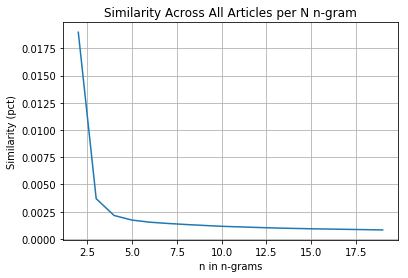

In [5]:
plt.plot(ax,ay)
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Articles per N n-gram')
plt.grid()

Here I will pick n=3. I'm looking for the inflection point between too similar and not enough similarity.  
N=2 isn't eliminating enough pairs but n=3 rides the line.

In [6]:
ay[1]

0.0036943617755636916

In [7]:
art_comp_dict_n3 = compare_directory(article_dir, n=3)
art_comp_dict_n3

{'article1.txt:article2.txt': 0.005181347150259086,
 'article1.txt:article3.txt': 0.01948051948051943,
 'article10.txt:article1.txt': 0.0062893081761006275,
 'article10.txt:article12.txt': 0.006198347107438051,
 'article10.txt:article13.txt': 0.22524752475247523,
 'article10.txt:article14.txt': 0.036170212765957444,
 'article10.txt:article15.txt': 0.0020161290322581182,
 'article10.txt:article16.txt': 0.0037383177570093906,
 'article10.txt:article17.txt': 0.00339558573853993,
 'article10.txt:article2.txt': 0.005807200929152101,
 'article10.txt:article28.txt': 0.0,
 'article10.txt:article29.txt': 0.0,
 'article10.txt:article3.txt': 0.0,
 'article10.txt:article38.txt': 0.0018450184501844769,
 'article10.txt:article4.txt': 0.0,
 'article10.txt:article5.txt': 0.0,
 'article10.txt:article6.txt': 0.0734939759036145,
 'article10.txt:article7.txt': 0.0023529411764705577,
 'article11.txt:article1.txt': 0.006211180124223614,
 'article11.txt:article10.txt': 0.017173051519154603,
 'article11.txt:a

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame({'compare':list(art_comp_dict_n3.keys()), 'similarity':list(art_comp_dict_n3.values())})
df.sort_values('similarity', ascending=False).head(5)

,compare,similarity
702,article17.txt:article16.txt,0.733333
646,article10.txt:article13.txt,0.225248
773,article4.txt:article3.txt,0.162162
392,article26.txt:article28.txt,0.128205
223,article31.txt:article26.txt,0.105590


The top similar articles are 16 and 17. Looking at the raw text we can see why. They are practically the same article except that article 17 has additional paragraphs inserted.

In [10]:
with open(os.path.join(article_dir, 'article17.txt')) as f:
    print(f.read())
    
with open(os.path.join(article_dir, 'article16.txt')) as f:
    print(f.read())
    

A study group said the United States
should increase its strategic petroleum reserve to one mln
barrels as one way to deal with the present and future impact
of low oil prices on the domestic oil industry.
    U.S. policy now is to raise the strategic reserve to 750
mln barrels, from its present 500 mln, to help protect the
economy from an overseas embargo or a sharp price rise.
    The Aspen Institute for Humanistic Studies, a private
group, also called for new research for oil exploration and
development techniques.
    It predicted prices would remain at about 15-18 dlrs a
barrel for several years and then rise to the mid 20s, with
imports at about 30 pct of U.S. consumption.
    The study cited two basic policy paths for the nation: to
protect the U.S. industry through an import fee or other such
device or to accept the full economic benefits of cheap oil.
    But the group did not strongly back either option, saying
there were benefits and drawbacks to both.
    It said instead th

The fifth most similar articles are 31 and 26.

In [11]:
with open(os.path.join(article_dir, 'article31.txt')) as f:
    print(f.read())
    
with open(os.path.join(article_dir, 'article26.txt')) as f:
    print(f.read())

A group of affiliated Miami-based
investment firms led by Fundamental Management Corp said it
raised its stake in Robeson Industries Corp to 238,000 shares,
or 14.6 pct of the total, from 205,000 or 12.8 pct.
    In a filing with the Securities and Exchange Commission,
the group said it bought 32,800 Robeson common shares between
Jan 26 and Feb 9 for 175,691 dlrs.
    The group said it may buy more shares and plans to study
Robeson's operations. Afterwards it may recommend that
management make changes in its operations. Fundamental
Management Chairman Carl Singer was recently elected to the
Robeson board.
 Reuter

A group of affiliated New York
investment firms said they lowered their stake in Cyclops Corp
to 260,500 shares, or 6.4 pct of the total outstanding common
stock, from 370,500 shares, or 9.2 pct.
    In a filing with the Securities and Exchange Commission,
the group, led by Mutual Shares Corp, said it sold 110,000
Cyclops common shares on Feb 17 and 19 for 10.0 mln dlrs.
 Reu

These two aren't the same but have a similar tone. They look like news blurbs about investment banks and control in specific companies. While the specifics are different, they are quite similar in tone and language.

## Compare Books

In [12]:
books_dir = os.path.join(base_path, books_subdir)

bx = []
by = []
for i in range(2,20):
    bx.append(i)
    compare_dict = compare_directory(books_dir, n=i)
    by.append(np.mean([v for v in compare_dict.values()]))

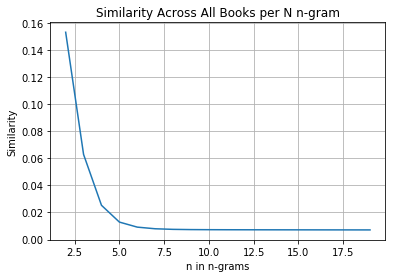

In [13]:
plt.plot(bx,by)
plt.xlabel('n in n-grams')
plt.ylabel('Similarity')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()

Here the inflection point is at n=4 or n=5. I will go with n=4. This is not quite the same as compare articles. It's interesting how quickly the similarity levels out to zero with long grams. It's not surprising that the n for books is longer than articles as books themselves are longer so we need a larger n to capture that. It is a bit surprising that n is only one longer though, I would have expected to find n=8 or 10.

In [14]:
by[2]

0.025290872844144496

In [15]:
book_comp_dict_n4 = compare_directory(books_dir, n=4)
book_comp_dict_n4

{'Adventures_of_Sherlock_Holmes.txt:3boat10.txt': 0.011315988091743834,
 'Adventures_of_Sherlock_Holmes.txt:Hound_of_the_Baskervilles.txt': 0.03877427592231708,
 'Adventures_of_Sherlock_Holmes.txt:Return_of_Sherlock_Holmes.txt': 0.04176380927846113,
 'Hound_of_the_Baskervilles.txt:3boat10.txt': 0.00905778021190995,
 'Return_of_Sherlock_Holmes.txt:3boat10.txt': 0.010800255663088398,
 'Return_of_Sherlock_Holmes.txt:Hound_of_the_Baskervilles.txt': 0.04003312789734659}

In [16]:
[k for k in book_comp_dict_n4.keys() if book_comp_dict_n4[k]>by[2]] 

['Adventures_of_Sherlock_Holmes.txt:Return_of_Sherlock_Holmes.txt',
 'Adventures_of_Sherlock_Holmes.txt:Hound_of_the_Baskervilles.txt',
 'Return_of_Sherlock_Holmes.txt:Hound_of_the_Baskervilles.txt']

The Sherlock Holmes books are similar to each other. 